# Individual Coding Exercise (ICE) 5¶

In this ICE 5, implementation of K-Means algorithm to create clusters and creating a silhouette plot to evalute the clusters is covered.

In [1]:
#importing the necessary packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Simulating data on a 2D plane with `make_blobs` function to return (1) a set of data and (2) true labels for each observation. It will be sotred in 2 variables: `twoDData` and `cluster_true`

In [2]:
from sklearn.datasets import make_blobs #importing make_blobs to simulate data

twoDData, cluster_true = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.50, random_state = 0)

print("Here are the first 10 rows of twoData:")
print(twoDData[:10])
print("Here are the true labels for each observation. But we don't need it.")
print(cluster_true[:10])

Here are the first 10 rows of twoData:
[[ 1.03992529  1.92991009]
 [-1.38609104  7.48059603]
 [ 1.12538917  4.96698028]
 [-1.05688956  7.81833888]
 [ 1.4020041   1.726729  ]
 [ 3.20722587  0.36765575]
 [-1.76133611  1.81716162]
 [ 1.34081536  4.36827878]
 [-0.37881944  8.33265721]
 [-0.80062564  8.52294205]]
Here are the true labels for each observation. But we don't need it.
[1 3 0 3 1 1 2 0 3 3]


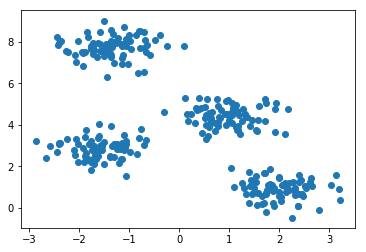

In [3]:
plt.scatter(twoDData[:,0], twoDData[:, 1])

In [4]:
from sklearn.cluster import KMeans

In [5]:
kmeans = KMeans(n_clusters = 4) #initializing the model by telling KMeans() the number of k
kmeans.fit(twoDData) #feeding data to the model
cluster_kmeans = kmeans.predict(twoDData) #getting the clustering result

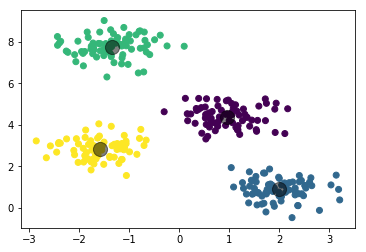

In [6]:
plt.scatter(twoDData[:, 0], twoDData[:, 1], c=cluster_kmeans, cmap='viridis') #using cluster_means as the indicator for clusters

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5); #plotting the centers onto scatter plot

#c is for color, s is for dotsize, and alpha is for transparency

The Silhouette Coefficient is used when the ground-truth about the dataset is unknown and computes the density of clusters computed by the model. The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for all samples. This process produces a score between 1 and -1, where 1 is highly dense clusters and -1 is completely incorrect clustering.

In [7]:
from sklearn.metrics import silhouette_score

silhouetteScore = silhouette_score(twoDData, cluster_kmeans, metric = 'euclidean')

#Print the score
print('Silhouetter Score:', silhouetteScore)

Silhouetter Score: 0.7356713838266389


The quickest way to obtain a silhouette plot is through the Silhouette Visualizer, which displays the silhouette coefficient for each sample on a per-cluster basis, visualizing which clusters are dense and which are not. This is particularly useful for determining cluster imbalance, or for selecting a value for **_`K`_** by comparing multiple visualizers.

In [8]:
from yellowbrick.cluster import SilhouetteVisualizer

In [9]:
smodel = KMeans(n_clusters=4)
visualizer = SilhouetteVisualizer(smodel, colors='yellowbrick')

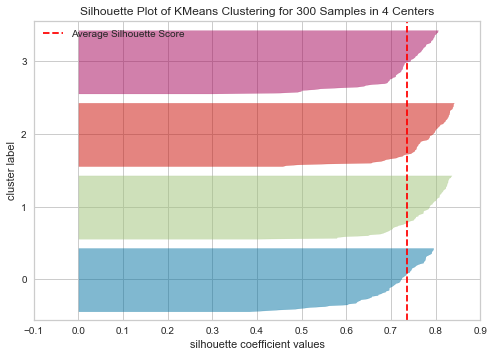

In [10]:
visualizer.fit(twoDData) #fitting the data to the visualizer
visualizer.show() #finalize and render the figure

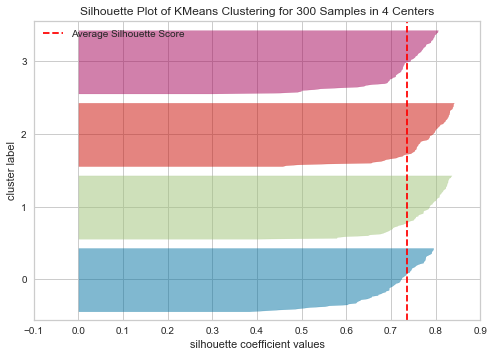

C:\Users\pooja\anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000014842AD28D0>,
                     colors='yellowbrick', model=None)

In [11]:
from yellowbrick.cluster import silhouette_visualizer
silhouette_visualizer(kmeans, twoDData, colors='yellowbrick')

The dataset `ICE5_Data` contains data of students' self-reported motivation scores for a class over 5 weeks. I will now look for patterns in motivation over this time and sort people into clusters based on those patterns.

In [13]:
motivation = pd.read_csv("ICE5_Data.csv")
motivation

,id,motivation1,motivation2,motivation3,motivation4,motivation5
0,10005216,2,2.0,2,2.0,2.0
1,10033216,3,NaN,3,NaN,NaN
2,10004216,1,2.0,1,2.0,2.0
3,10008216,1,2.0,1,2.0,NaN
4,10026216,3,NaN,3,NaN,NaN
5,10014216,2,NaN,2,NaN,2.0
6,10021216,2,2.0,2,2.0,2.0
7,10013216,2,NaN,2,NaN,1.0
8,10035216,2,3.0,2,3.0,NaN
9,10015216,2,2.0,2,2.0,2.0


In [15]:
#cleaning the data by dropping NaN values and the 'id' column

motivationNA = motivation.dropna()
motivationClean = motivationNA.drop(['id'], axis = 1)
motivationClean

,motivation1,motivation2,motivation3,motivation4,motivation5
0,2,2.0,2,2.0,2.0
2,1,2.0,1,2.0,2.0
6,2,2.0,2,2.0,2.0
9,2,2.0,2,2.0,2.0
11,2,1.0,2,1.0,2.0
13,2,3.0,2,3.0,1.0
14,1,1.0,1,1.0,4.0
16,1,1.0,1,1.0,3.0
17,1,1.0,1,1.0,1.0
18,1,1.0,1,1.0,1.0


In [16]:
#Trying a two-cluster model

motivationkmeans2 = KMeans(n_clusters=2)
motivationkmeans2.fit(motivationClean)
cluster_motivation2 = motivationkmeans2.predict(motivationClean)

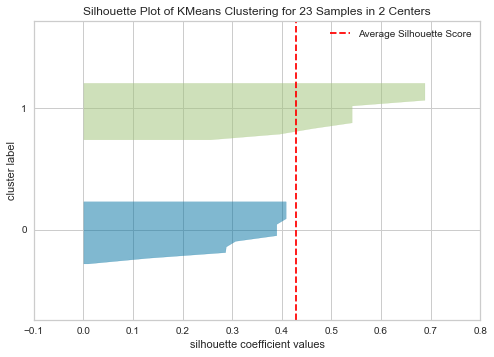

Silhouetter Score: 0.4278253443934091


In [17]:
silhouette_visualizer(motivationkmeans2, motivationClean, colors='yellowbrick')

silhouetteScore2 = silhouette_score(motivationClean, cluster_motivation2, metric='euclidean')

print('Silhouetter Score:', silhouetteScore2)

Score of 0.43 for the silhouette plot is not bad. Cluster 0 has more similarities and Cluster 1 is heteregeneous.

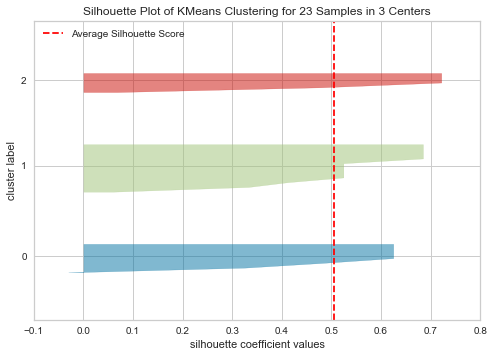

Silhouetter Score: 0.5055274484044375


In [18]:
#Trying three clusters

motivationkmeans3 = KMeans(n_clusters=3)
motivationkmeans3.fit(motivationClean)
cluster_motivation3 = motivationkmeans3.predict(motivationClean)
silhouette_visualizer(motivationkmeans3, motivationClean, colors='yellowbrick')
silhouetteScore3 = silhouette_score(motivationClean, cluster_motivation3, metric='euclidean')
print('Silhouetter Score:', silhouetteScore3)

The `cluster_n = 3` below seems more reasonable. The silhouette coefficient increases and all three clusters all have similar intra-cluster similarity (i.e., flat head).

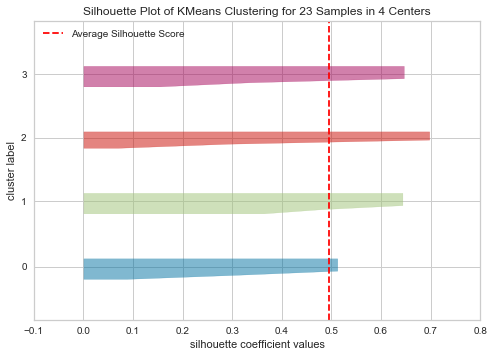

Silhouetter Score: 0.49488453159748896


In [19]:
# Trying four clusters

motivationkmeans4 = KMeans(n_clusters=4)
motivationkmeans4.fit(motivationClean)
cluster_motivation4 = motivationkmeans4.predict(motivationClean)
silhouette_visualizer(motivationkmeans4, motivationClean, colors='yellowbrick')
silhouetteScore4 = silhouette_score(motivationClean, cluster_motivation4, metric='euclidean')
print('Silhouetter Score:', silhouetteScore4)

The `cluster_n = 4` case is not too different. The silhouette coefficient drops and all four clusters all still have similar intra-cluster similarity. So we can claim that cluster_n = 3 is a more reasonable classification.

In [20]:
#creating a new dataframe to contain the clustering result
#regular = sign won't work because motivationClean will be changed as motivation3cluster

motivation3cluster = motivationClean.copy(deep=True)

motivation3cluster['cluster'] = cluster_motivation3

motivation3cluster

,motivation1,motivation2,motivation3,motivation4,motivation5,cluster
0,2,2.0,2,2.0,2.0,0
2,1,2.0,1,2.0,2.0,2
6,2,2.0,2,2.0,2.0,0
9,2,2.0,2,2.0,2.0,0
11,2,1.0,2,1.0,2.0,0
13,2,3.0,2,3.0,1.0,0
14,1,1.0,1,1.0,4.0,1
16,1,1.0,1,1.0,3.0,1
17,1,1.0,1,1.0,1.0,2
18,1,1.0,1,1.0,1.0,2
